### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('HousePrices-ToBuildAndTestTheModel.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df = df.drop('Id', axis = 1)

In [8]:
categorical = df.dtypes[df.dtypes == 'object'].index.values.tolist()
numerical = df.dtypes[df.dtypes != 'object'].index.values.tolist()

### Verifying Duplicates

In [9]:
print("Duplicate Rows :") 
df[df.duplicated()] 

Duplicate Rows :


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Null-values

#### Numerical features

In [10]:
nok_numerical = [col for col in numerical if df[col].isna().sum() > 0]
nok_numerical

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [11]:
df[nok_numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [12]:
df[nok_numerical].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


As we can see, since the median (50%) and the mean are close for 'LotFrontage' and 'GarageYrBlt', replacing the null values with the mean is a good strategy. However, it's better to choose another input method for the 'MasVnrArea' feature.

The 'MasVnrArea' feature has just 8 missing values. Besides, most of the values are zero on it, so we are going to input the most frequent number.

In [13]:
df['LotFrontage'].fillna(value = df['LotFrontage'].mean(), inplace = True)
df['GarageYrBlt'].fillna(value = df['GarageYrBlt'].mean(), inplace = True)

In [14]:
input_mode = df['MasVnrArea'].mode().values[0]
df['MasVnrArea'].fillna(value = input_mode, inplace = True)

In [15]:
df['LotFrontage'].isna().sum()

0

In [16]:
df['GarageYrBlt'].isna().sum()

0

In [17]:
df['MasVnrArea'].isna().sum()

0

#### Categorical features

In [18]:
nok_categorical = [col for col in categorical if df[col].isna().sum() > 0]
nok_categorical

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
df[nok_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         91 non-null     object
 1   MasVnrType    1452 non-null   object
 2   BsmtQual      1423 non-null   object
 3   BsmtCond      1423 non-null   object
 4   BsmtExposure  1422 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinType2  1422 non-null   object
 7   Electrical    1459 non-null   object
 8   FireplaceQu   770 non-null    object
 9   GarageType    1379 non-null   object
 10  GarageFinish  1379 non-null   object
 11  GarageQual    1379 non-null   object
 12  GarageCond    1379 non-null   object
 13  PoolQC        7 non-null      object
 14  Fence         281 non-null    object
 15  MiscFeature   54 non-null     object
dtypes: object(16)
memory usage: 182.6+ KB


In [20]:
df[df['PoolArea'] > 0].shape

(7, 80)

The feature 'PoolQC' has values just when the house has a pool. Looking at the variable 'PoolArea', we can see that there are just 7 houses with a pool. For now, we are going the input the category 'NA' as described on the metadata

In [21]:
df['PoolQC'] = df['PoolQC'].mask(df['PoolQC'].isna(), 'NA')
df['PoolQC'].isna().sum()

0

Looking at the metadata, we can see that the features 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature' all have a category 'NA' that as missinterpreted as Null. That said, we can input this category on these features

In [22]:
actually_ok_categorical = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']

In [23]:
for col in actually_ok_categorical:
    df[col] = df[col].mask(df[col].isna(), 'NA')

In [24]:
df[actually_ok_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         1460 non-null   object
 1   BsmtQual      1460 non-null   object
 2   BsmtCond      1460 non-null   object
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinType1  1460 non-null   object
 5   BsmtFinType2  1460 non-null   object
 6   FireplaceQu   1460 non-null   object
 7   GarageType    1460 non-null   object
 8   GarageFinish  1460 non-null   object
 9   GarageQual    1460 non-null   object
 10  GarageCond    1460 non-null   object
 11  Fence         1460 non-null   object
 12  MiscFeature   1460 non-null   object
dtypes: object(13)
memory usage: 148.4+ KB


In [25]:
for feat in actually_ok_categorical:
    nok_categorical.remove(feat)

In [26]:
nok_categorical.remove('PoolQC')

In [27]:
nok_categorical

['MasVnrType', 'Electrical']

In [28]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
df[df['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


In [30]:
df[df['Electrical'] == 'SBrkr']['SalePrice'].mean()

186825.1131934033

In [31]:
df[df['Electrical'] == 'SBrkr']['SalePrice'].median()

170000.0

From the describe command, it's possible to see that the average SalePrice is 163000 and the median is 180921.195890.

'SBrkr' is the most frequent category and it seems to be a good approximation for this type of house.

In [32]:
df['Electrical'] = df['Electrical'].mask(df['Electrical'].isna(), 'SBrkr')
df['Electrical'].isna().sum()

0

In [33]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [34]:
df[df['MasVnrType'].isna()]['MasVnrArea']

234     0.0
529     0.0
650     0.0
936     0.0
973     0.0
977     0.0
1243    0.0
1278    0.0
Name: MasVnrArea, dtype: float64

For the records on which 'MasVnrType' is Null, 'MasVnrArea' is zero, then, you can put these records on the category 'None'

In [35]:
df['MasVnrType'] = df['MasVnrType'].mask(df['MasVnrType'].isna(), 'None')
df['MasVnrType'].isna().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Outliers

In [37]:
num_outliers = [col for col in numerical if (3 * df[col].quantile(0.95)) < (df[col].max())]
num_outliers

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [38]:
df[num_outliers].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.117123,443.639726,46.549315,1057.429452,5.844521,46.660274,21.954110,3.409589,2.758904,43.489041
std,22.024023,9981.264932,180.731373,456.098091,161.319273,438.705324,48.623081,66.256028,61.119149,29.317331,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,795.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.049958,9478.500000,0.000000,383.500000,0.000000,991.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,1298.250000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,6110.000000,572.000000,547.000000,552.000000,508.000000,738.000000,15500.000000


In [39]:
for col in numerical:
    limit = 3 * df[col].quantile(0.95)
    if ((limit > 0) & (limit < (df[col].max()))):
        df = df[df[col] < limit]

In [40]:
df.shape

(1443, 80)

### Dummies for Categorical Features

In [41]:
df2 = pd.get_dummies(df, columns = categorical, drop_first = True)

In [42]:
df2.shape

(1443, 259)

In [43]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


### Correlation

In [44]:
corr_df = df[numerical].corr()

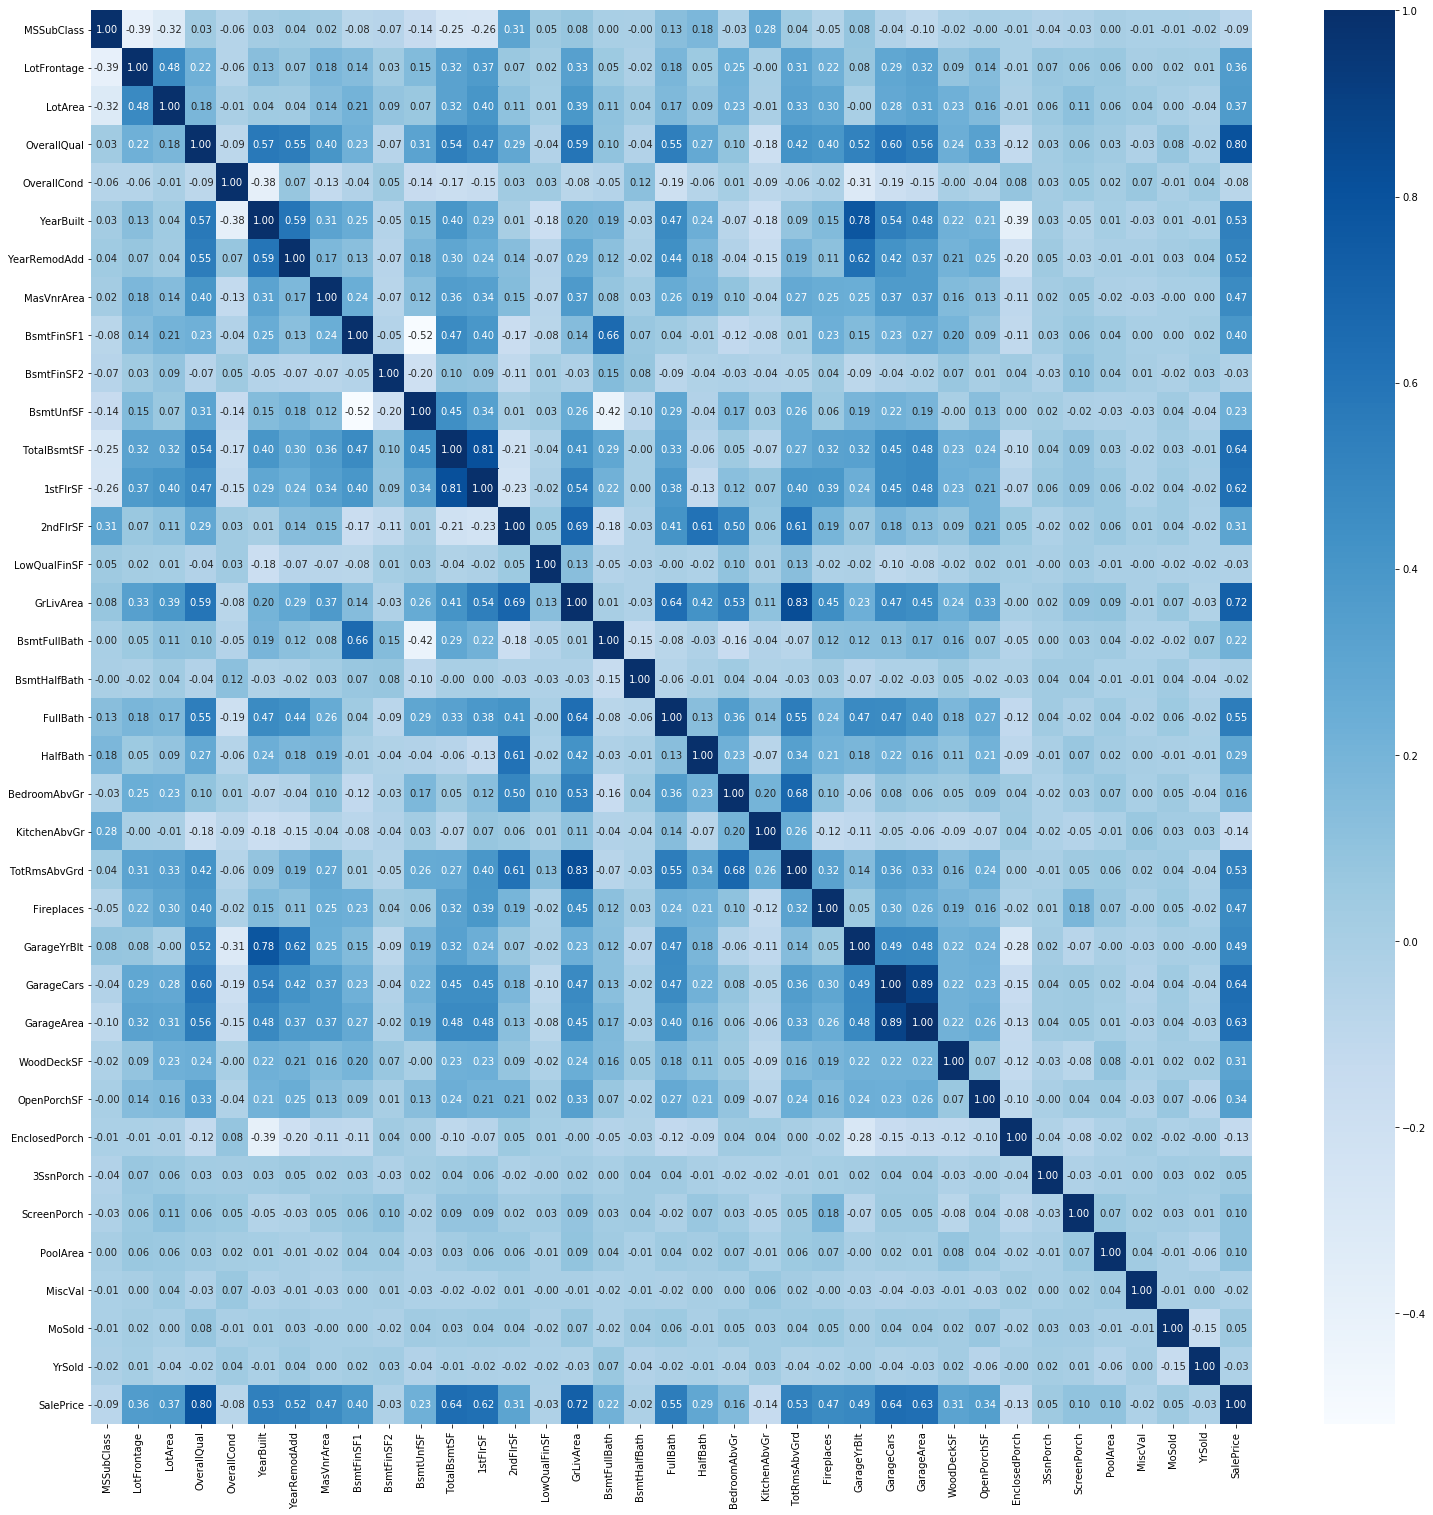

In [45]:
plt.figure(figsize = (26, 26))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

### Preparing to run the model

After cleaning and preparing the data, our final dataset has too many features for the quantity of observations. That way, the model will probably suffer from overfitting, so a feature selection is needed in this case.

A good technique is to use the penalty models for regression. In this case, we are going to test the penalty l2 - Lasso and ElasticNet

In [46]:
scaler = StandardScaler()

In [47]:
X = df2.drop('SalePrice', axis = 1)
y = df2['SalePrice']

In [48]:
X_columns = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X_columns)

In [49]:
X_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.071817,-0.230681,-0.304858,0.659206,-0.517707,1.048466,0.878401,0.554253,0.623601,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
1,-0.873516,0.524860,-0.055716,-0.066927,2.172755,0.154863,-0.429682,-0.584573,1.250988,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
2,0.071817,-0.079573,0.301750,0.659206,-0.517707,0.982273,0.829954,0.356701,0.116155,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
3,0.308150,-0.482528,-0.066548,0.659206,-0.517707,-1.864018,-0.720368,-0.584573,-0.506619,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,-2.138090,-0.306612
4,0.071817,0.726337,0.953853,1.385339,-0.517707,0.949177,0.733059,1.449044,0.505966,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,0.071817,-0.381790,-0.420330,-0.066927,-0.517707,0.916080,0.733059,-0.584573,-1.004839,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
1439,-0.873516,0.776707,0.718792,-0.066927,0.379113,0.221056,0.151688,0.106857,0.817353,0.755299,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
1440,0.308150,-0.180312,-0.176604,0.659206,3.069576,-1.003512,1.023744,-0.584573,-0.370532,-0.288454,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612
1441,-0.873516,-0.079573,-0.030368,-0.793060,0.379113,-0.705644,0.539269,-0.584573,-0.891817,6.300637,...,-0.058967,-0.058967,-0.302536,-0.045644,0.391762,-0.052723,-0.091574,-0.118553,0.467707,-0.306612


In [ ]:
train_test_split

In [ ]:
Lasso

In [ ]:
ElasticNet